In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
curr_year = time.strftime("%Y")

import numpy as np
plt.style.use('ggplot')

## OLS på adgangskvotienter og ansøgere/optaget på KU

#### Henter data fra KU

In [2]:
years = ["2020","2019","2018","2017"]

def get_ansog(years):
    
    
    ansog_dict = dict()
    ansog_list = list()
    
    for year in years:
        df_list = list()
        #Henter alt ansøgnings data
        human_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_humaniora/",
                                     thousands=".")[0]
        if year == "2018":
            df = human_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "human"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = human_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "human"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = human_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "human"
            df_list.append(df)
        
        jura_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_jura/",
                                   thousands=".")[0]
        if year == "2018":
            df = jura_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "jura"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = jura_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "jura"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = jura_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "jura"
            df_list.append(df)
            
        
        natur_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_science/",
                                    thousands=".")[0]
        if year == "2018":
            df = natur_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "natur"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = natur_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "natur"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = natur_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "natur"
            df_list.append(df)
        
        samf_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_samfund/",
                                   thousands=".")[0]
        if year == "2018":
            df = samf_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "samf"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = samf_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "samf"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = samf_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "samf"
            df_list.append(df)
            
        
        sund_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_sund/",
                                   thousands=".")[0]
        if year == "2018":
            df = sund_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "sund"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = sund_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "sund"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = sund_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "sund"
            df_list.append(df)
            
            
        teo_ansoger = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-ansoegninger-i-alt/ansoegere_teologi/",
                                  thousands=".")[0]
        if year == "2018":
            df = teo_ansoger.iloc[:,[0,1,2]].iloc[2:-1]
            df["fakultet"] = "teo"
            df_list.append(df)
        elif year == "2019" or year == "2020":
            df = teo_ansoger.iloc[:,[0,3,4]].iloc[:-1]
            df["fakultet"] = "teo"
            df_list.append(df)
        elif year == "2017" or year == "2016":
            df = teo_ansoger.iloc[:,[0,3,4]].iloc[2:-1]
            df["fakultet"] = "teo"
            df_list.append(df)
            
        
        #Alle ansøgninger for givent år
        ansog_df = pd.concat(df_list,axis=0,ignore_index=True)
        ansog_df.columns = ["studie","total","1. prioritet","fakultet"]
        for column in ["total","1. prioritet"]:
            ansog_df[column] = pd.to_numeric(ansog_df[column])
        
        #Tilføjer år, så jeg kan lave dummy til de senere OLS
        ansog_df["år"] = year
        
        #Tilføjer til liste og dict
        ansog_list.append(ansog_df)
        ansog_dict[year] = ansog_df
        
    if len(ansog_list) > 1:
        ansog_df = pd.concat(ansog_list,axis=0,ignore_index=True)
    else:
        ansog_df = ansog_list[0]
    #Tilføjer Dummies
    #dummies = pd.get_dummies(ansog_df["år"])
    #ansog_df = ansog_df.join(dummies)
    #ansog_df.drop("år",axis=1,inplace=True)
    
    return ansog_df, ansog_dict

def get_optag(years):
    
    optag_dict = dict()
    optag_list = list()
    for year in years:
        df_list = list()
        df = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/antal-optagne/",thousands=".")
        
        human_optag = df[3].iloc[:,[0,-1]].iloc[2:]
        df_list.append(human_optag)
        
        sund_optag = df[1].iloc[:,[0,-1]].iloc[2:]
        df_list.append(sund_optag)
        
        natur_optag = df[2].iloc[:,[0,-1]].iloc[2:]
        df_list.append(natur_optag)
        
        jur_optag = df[4].iloc[:,[0,-1]].iloc[2:]
        df_list.append(jur_optag)
        
        samf_optag = df[5].iloc[:,[0,-1]].iloc[2:]
        df_list.append(samf_optag)
        
        teo_optag = df[6].iloc[:,[0,-1]].iloc[2:]
        df_list.append(teo_optag)
        
        concat_df = pd.concat(df_list,axis=0,ignore_index=True)
        concat_df.columns = ["studie","optaget"]
        concat_df["år"] = year
        
        concat_df["optaget"] = pd.to_numeric(concat_df["optaget"])
        
        optag_list.append(concat_df)
        optag_dict[year] = concat_df
        
    optag_df = pd.concat(optag_list,axis=0,ignore_index=True)
    
    return optag_df, optag_dict

def get_adgang(years):
    
    adgang_dict = dict()
    adgang_list = list()
    for year in years:
        df_list = list()
        
        df = pd.read_html(f"https://studier.ku.dk/bachelor/ansoegning-og-optagelse/optagelsesstatistik/{year}/adgangskvotienter/",
                         thousands=".")
        
        sund_adgang = df[0].iloc[:,[0,1]].iloc[1:]
        df_list.append(sund_adgang)
        
        natur_adgang = df[1].iloc[:,[0,1]].iloc[1:]
        df_list.append(natur_adgang)
        
        human_adgang = df[2].iloc[:,[0,1]].iloc[1:]
        df_list.append(human_adgang)
        
        jura_adgang = df[3].iloc[:,[0,1]].iloc[1:]
        df_list.append(jura_adgang)
        
        samf_adgang = df[4].iloc[:,[0,1]].iloc[1:]
        df_list.append(samf_adgang)
        
        teo_adgang = df[5].iloc[:,[0,1]].iloc[1:]
        df_list.append(teo_adgang)
        
        concat_df = pd.concat(df_list,ignore_index=True,axis=0)
        concat_df.columns = ["studie","kvotient"]
        
        #Fikser alle fejl i deres HTML
        concat_df["kvotient"] = concat_df["kvotient"].str.replace("Alle optaget. ledige pladser","6")
        concat_df["kvotient"] = concat_df["kvotient"].str.replace("Alle optaget","6")
        concat_df["kvotient"] = concat_df["kvotient"].str.replace("Â","")
        concat_df["kvotient"] = concat_df["kvotient"].str.strip()
        concat_df["kvotient"] = pd.to_numeric(concat_df["kvotient"].str.replace(",","."))
        
        concat_df["år"] = year
        
        adgang_list.append(concat_df)
        adgang_dict[year] = concat_df
        
    adgang_df = pd.concat(adgang_list,axis=0,ignore_index=True)
        
    
    return adgang_df, adgang_dict


def collab_df(optag_df,ansog_df,adgang_df,years):
    
    if years[0] == curr_year:
        optag_dummy = pd.DataFrame({"studie":ansog_df["studie"][ansog_df["år"]==years[0]],
                                    })
        optag_dummy["optaget"] = np.zeros((len(ansog_df["studie"][ansog_df["år"]==years[0]]),1))
        optag_dummy["år"]=years[0]
        
        optag_df = pd.concat([optag_dummy,optag_df,],axis=0,ignore_index=True)
        
        adgang_dummy = pd.DataFrame({"studie":ansog_df["studie"][ansog_df["år"]==years[0]],
                                   })
        adgang_dummy["kvotient"] = np.zeros((len(ansog_df["studie"][ansog_df["år"]==years[0]]),1))
        adgang_dummy["år"]=years[0]
        
        adgang_df = pd.concat([adgang_dummy,adgang_df],axis=0,ignore_index=True)
    else:
        None
    
    ansog_df = ansog_df.merge(adgang_df,how="outer",on=["studie","år"])
    ansog_df = ansog_df.merge(optag_df,how="outer",on=["studie","år"])
    
    df = ansog_df
    df.fillna(0)
    
    #Tilføjer Dummies - år
    dummy_year = pd.get_dummies(df["år"])
    #adgang_df.drop("år",inplace=True)
    df = df.join(dummy_year)
    
    #Tilføjer dummies - fakultet
    dummy_faculty = pd.get_dummies(df["fakultet"])
    df.drop("fakultet",inplace=True,axis=1)
    df = df.join(dummy_faculty)
    
    #Laver ansoger/optaget ratio på baggrund af år 0 ansøgere og år -1 optagere
    ratio = list()
    study_list = list()
    year_list = list()
    for year in years[:-1]:
        for study in df["studie"][df[year]==1].tolist():
            if study in df["studie"][df[str(int(year)-1)]==1].tolist():
                first_ratio = df["total"][df[year]==1][df["studie"]==study].values / df["optaget"][df[str(int(year)-1)]==1][df["studie"]==study].values
                ratio.extend(first_ratio)
                study_list.append(study)
                year_list.append(year)

    ratio_df = pd.DataFrame.from_dict({"studie":study_list,
                                       "år":year_list,
                                       "ratio":np.power(ratio,1)})
    
    df = df.merge(ratio_df,on=["studie","år"])
    
    #Laver ratio på baggrund af 1. prioritet ansøgninger
    ratio = list()
    study_list = list()
    year_list = list()
    for year in years[:-1]:
        for study in df["studie"][df[year]==1].tolist():
            if study in df["studie"][df[str(int(year)-1)]==1].tolist():
                first_ratio = df["1. prioritet"][df[year]==1][df["studie"]==study].values / df["optaget"][df[str(int(year)-1)]==1][df["studie"]==study].values
                ratio.extend(first_ratio)
                study_list.append(study)
                year_list.append(year)
    ratio_df = pd.DataFrame.from_dict({"studie":study_list,
                                         "år":year_list,
                                         "1. ratio":np.power(ratio,1)})
    
    df = df.merge(ratio_df,on=["studie","år"])
    #Fjerner det år uden ratio
    df = df[df["år"]!=years[-1]]
    df.drop(years[-1],inplace=True,axis=1)
    
    #Fjerner alle der ikke har et snit
    df = df[df["kvotient"] != 6][df["kvotient"] != 2.9]
    
    df.dropna(inplace=True)
    return df

def outlier(outlier_df,index):

    outlier_df["studie"] = index
    outlier_df.set_index("studie",inplace=True)
    outlier_df = outlier_df[outlier_df["unadj_p"]<0.5]

    print("Biggest outliers at: ")
    print(outlier_df.nsmallest(15,"unadj_p"))
    
    return outlier_df



In [3]:
#Henter data
optag_df, optag_dict = get_optag(years[1:])
ansog_df, ansog_dict = get_ansog(years)
adgang_df, adgang_dict = get_adgang(years[1:])

In [4]:
#Sætter alle df sammen
df = collab_df(optag_df,ansog_df,adgang_df,years)

#Kigger på df
df.head()

/Users/frederikfindsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:292: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,studie,total,1. prioritet,år,kvotient,optaget,2018,2019,2020,human,jura,natur,samf,sund,teo,ratio,1. ratio
3,AudiologopÃ¦di,148.0,65.0,2020,0.0,0.0,0,0,1,1,0,0,0,0,0,3.441860,1.511628
4,Dansk,426.0,128.0,2020,0.0,0.0,0,0,1,1,0,0,0,0,0,2.613497,0.785276
5,Engelsk,436.0,117.0,2020,0.0,0.0,0,0,1,1,0,0,0,0,0,3.048951,0.818182
6,EuropÃ¦isk etnologi,207.0,53.0,2020,0.0,0.0,0,0,1,1,0,0,0,0,0,3.089552,0.791045
7,Film- og medievidenskab,498.0,226.0,2020,0.0,0.0,0,0,1,1,0,0,0,0,0,5.724138,2.597701


#### Kører regression

We have the following OLS Model:
$
kvotient_{i}=\beta_0+\beta_1(\frac{ansøgere_{t}}{optaget_{t-1}})_{i})+\beta_2(\frac{(1.prioritetsansøgere_{t}}{optaget_{t-1}})_{i}+\beta_3ansøgere_{i}+\beta_4(1.prioritetsansøgere)_{i}+X_{i}
$
Where X is a dummy for alle the facultys, giving at:
$X_{i}=\beta_5humandummy_{i}+\beta_6jura_{i}+\beta_7natur_{i}+\beta_8samf_{i}+\beta_9sund_{i}$


In [5]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm_outlier

In [6]:
X = df[["ratio","1. ratio","total","1. prioritet","human","jura","natur","samf","sund"]][df["år"]==str(int(years[0])-1)]
X = sm.add_constant(X)
y = df["kvotient"][df["år"]==str(int(years[0])-1)]

In [12]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
results.save("OLS_results")

                            OLS Regression Results                            
Dep. Variable:               kvotient   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     7.420
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           7.14e-05
Time:                        11:57:28   Log-Likelihood:                -39.041
No. Observations:                  32   AIC:                             96.08
Df Residuals:                      23   BIC:                             109.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0735      0.701     10.091   

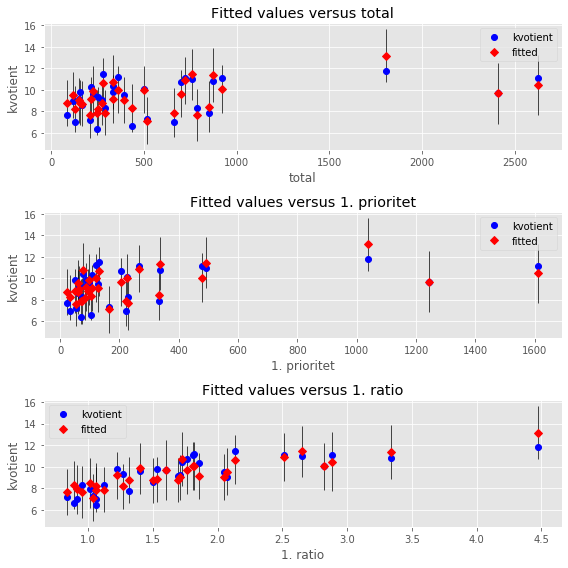

In [8]:
fig, ax = plt.subplots(3,1,figsize=(8, 8))
fig = sm.graphics.plot_fit(results,3,ax=ax[0])
fig = sm.graphics.plot_fit(results,4,ax=ax[1])
fig = sm.graphics.plot_fit(results,2,ax=ax[2])
fig.tight_layout()

#plt.savefig("fitted_versus_actual.jpg")
plt.show()

In [101]:
outlier_test = results.outlier_test()
outlier_df = outlier(outlier_test,df[df["år"]=="2019"]["studie"])

Biggest outliers at: 
                         student_resid   unadj_p  bonf(p)
studie                                                   
Psykologi                    -2.244988  0.035150      1.0
Biokemi                      -2.178773  0.040342      1.0
Medicin                       2.065789  0.050824      1.0
Religionsvidenskab           -1.654147  0.112297      1.0
MolekylÃ¦r biomedicin         1.407294  0.173312      1.0
Forhistorisk arkÃ¦ologi      -1.372147  0.183848      1.0
Litteraturvidenskab           1.329818  0.197202      1.0
Statskundskab                 1.271265  0.216912      1.0
Sociologi                     1.235927  0.229520      1.0
PÃ¦dagogik                    1.209706  0.239231      1.0
Klassisk arkÃ¦ologi          -1.170706  0.254242      1.0
Datalogi                     -1.127520  0.271670      1.0
Lingvistik                    1.054194  0.303235      1.0
Forsikringsmatematik          1.037366  0.310834      1.0
Farmaci                       0.904718  0.375416  

##### Prædikteret værdier for 2020

In [102]:
x_2020 = df[["ratio","1. ratio","total","1. prioritet","human","jura","natur","samf","sund"]][df["år"]=="2020"]
x_2020 = sm.add_constant(x_2020)

kvotienter_2020 = pd.DataFrame({"studie":df["studie"][df["år"]=="2020"],"kvotienter_2020":round(results.predict(x_2020),2)})

In [103]:
kvotienter_2020 = kvotienter_2020.merge(df[["kvotient","studie"]][df["år"]=="2019"],on="studie")
kvotienter_2020.columns = ["studie","kvo_2020","kvo_2019"]
kvotienter_2020["change, pct."] = round((kvotienter_2020["kvo_2020"]/kvotienter_2020["kvo_2019"]-1),2)*100
kvotienter_2020.set_index("studie",inplace=True)

In [104]:
kvotienter_2020

,kvo_2020,kvo_2019,"change, pct."
studie,,,
AudiologopÃ¦di,8.74,9.2,-5.0
EuropÃ¦isk etnologi,7.56,7.2,5.0
Film- og medievidenskab,9.70,10.1,-4.0
Filosofi,8.91,9.5,-6.0
Forhistorisk arkÃ¦ologi,8.18,7.0,17.0
Historie,7.05,7.3,-3.0
Klassisk arkÃ¦ologi,8.45,7.7,10.0
Kommunikation og it,7.37,8.3,-11.0
Kunsthistorie,8.39,9.1,-8.0


In [105]:
import tabulate
print(tabulate.tabulate(kvotienter_2020.reset_index().values,kvotienter_2020.reset_index().columns, tablefmt="pipe"))

| studie                        |   kvo_2020 |   kvo_2019 |   change, pct. |
|:------------------------------|-----------:|-----------:|---------------:|
| AudiologopÃ¦di                |       8.74 |        9.2 |             -5 |
| EuropÃ¦isk etnologi           |       7.56 |        7.2 |              5 |
| Film- og medievidenskab       |       9.7  |       10.1 |             -4 |
| Filosofi                      |       8.91 |        9.5 |             -6 |
| Forhistorisk arkÃ¦ologi       |       8.18 |        7   |             17 |
| Historie                      |       7.05 |        7.3 |             -3 |
| Klassisk arkÃ¦ologi           |       8.45 |        7.7 |             10 |
| Kommunikation og it           |       7.37 |        8.3 |            -11 |
| Kunsthistorie                 |       8.39 |        9.1 |             -8 |
| Lingvistik                    |       8.57 |        9.8 |            -13 |
| Litteraturvidenskab           |       8.73 |       10.3 |            -15 |

In [13]:
ols_results = pd.read_pickle("OLS_results")